## pygalfitm python package

The python package has a main class that is PyGalfitm that is a wrapper for the executable GALFITM

```
pygalfitm.PyGalfitm()
```

The PyGalfitm class takes only one parameter that is the executable (str, optional): that is the path to galfitm executable, **if left as default downloads the executable depending on the OS.** Defaults to os.path.join(pygalfitm.__path__[0], "galfitm").

In [31]:
from pygalfitm import PyGalfitm

pygal_obj = PyGalfitm()

### GALFITM feedme

The feedme input file to GALFITM is separated here in two main parts. The base config that are items A - Z and all other components (sersic, psf...)



#### BASE CONFIG

The base config may be setted and viewed with the funcions below: 

In [32]:
pygal_obj.set_base({ 
    "A": "pygalfitm_tutorial",
    "B": "g,r,i,z,u",
    "A1": "g,r,i,z,u"
}) ## Set the base parameters in this way

pygal_obj.print_base() ## Print the base parameters

A) pygalfitm_tutorial               # Input data image (FITS file)
A1) g,r,i,z,u                        # Nick names (band labels) 
A2) 4770, 6231, 7625                 # Effective wavelenghts
B) g,r,i,z,u                        # Output data image block
C)                                  # Sigma image name (made from data if blank or 'none')
D)                                  # Input PSF image and (optional) diffusion kernel
E) 1                                # PSF fine sampling factor relative to data 
F) none                             # Bad pixel mask (FITS image or ASCII coord list)
G) none                             # File with parameter constraints (ASCII file) 
H) 1    200  1  200                 # Image region to fit (xmin xmax ymin ymax)
I) 200  200                         # Size of the convolution box (x y)
J) 0,0,0                            # Magnitude photometric zeropoint
K) 0.55  0.55                       # Plate scale (dx dy)   [arcsec per pixel]
O) regular      

#### COMPONENTS

Numerous components exist (sky, sersic, expdisk, moffat, ferrer, psf, nuker, corser, devauc, edgedisk, gaussian, king), so in order to maintain organization when deciding which ones to utilize and include in the feedme, **we can manage the active list for processing** by selectively activating and deactivating components.


In [30]:
##IGNORE
pygal_obj.activate_components(["sersic"])

## To **check what components are currently active**:
print("Components before clear: ", pygal_obj.active_components)

## To clean component list, first we run:
pygal_obj.activate_components()

## Then we can activate components:
pygal_obj.activate_components(["sersic", "sersic", "expdisk"]) ## If you add two times the same component, the second will be added as {component}2...

Added component as sersic2
Components before clear:  ['sersic', 'sersic1', 'expdisk', 'sersic2']
Added component as sersic1


#### Setting and printing components 

Components work a little bit different from the base. Each parameter in the components (1 - 10) have 3 columns.

When setting a parameter you may pass a tuple with the values that you want to set for each of the columns. The first value in the tuple corresponds to the first column and so goes on. 

In [37]:
pygal_obj.set_component("sersic", {
    "1": ( "1", 3, "cheb" ), ## Setting all 3 values
    "3": ( "TEST" ), ## Setting only the value of the first column
    "4": ( "ftest", 4 ), ## Setting the value of the first and second columns
})

## Print it by component name (sersic, sersic1, psf...)
pygal_obj.print_component("sersic")

1) 1                                   3     cheb       # Position x [pixel]
2) 200.0,200.0,200.0                   1     band       # Position y [pixel]
3) TEST                                3     band       # Integrated magnitude
4) ftest                               4     band       # R_e (effective radius) [pix]
5) 4                                   2     band       # Sersic index n (de Vaucouleurs n=4)
9) 0,0,0                               1     band       # Axis ratio (b/a)
10) 0,0,0                               1     band       # Position angle (PA) [deg: Up=0, Left=90]
Z) 0                                                    # Skip this model in output image? (yes=1, no=0)


In [ ]:
pygal_obj.write_feedme()

In [25]:
pygalgitm_object = splus.get_splus_class(
    "test", 51.30076502619376, -32.90247622337992, 200, 
    'dev/data/', 
    'dev/outputs/', 
    conn, 
    bands=["z", "i", "r", "g", "u"])

finished
finished
finished
finished
finished


In [26]:
pygalgitm_object.active_components

['sersic']

In [27]:
pygalgitm_object.print_base()

A) data/test_z.fits,data/test_i.fits,data/test_r.fits,data/test_g.fits,data/test_u.fits # Input data image (FITS file)
A1) z,i,r,g,u                        # Nick names (band labels) 
A2) 8936.64,7670.59,6251.83,4758.49,3533.29 # Effective wavelenghts
B) outputs/testss.fits              # Output data image block
C) none                             # Sigma image name (made from data if blank or 'none')
D) data/psf_test_z.fits,data/psf_test_i.fits,data/psf_test_r.fits,data/psf_test_g.fits,data/psf_test_u.fits # Input PSF image and (optional) diffusion kernel
E) 1                                # PSF fine sampling factor relative to data 
F) none                             # Bad pixel mask (FITS image or ASCII coord list)
G) none                             # File with parameter constraints (ASCII file) 
H) 1   200  1   200                 # Image region to fit (xmin xmax ymin ymax)
I) 200 200                          # Size of the convolution box (x y)
J) 22.766,23.344,23.535,23.49,20.8

In [34]:
pygalgitm_object.write_component("sersic", feedme_path="outputs/galfit.feedme")

In [35]:
pygalgitm_object.write_feedme()

In [36]:
_ = pygalgitm_object.run()

In [37]:
import matplotlib.pyplot as plt

from pygalfitm.read import read_output_to_class

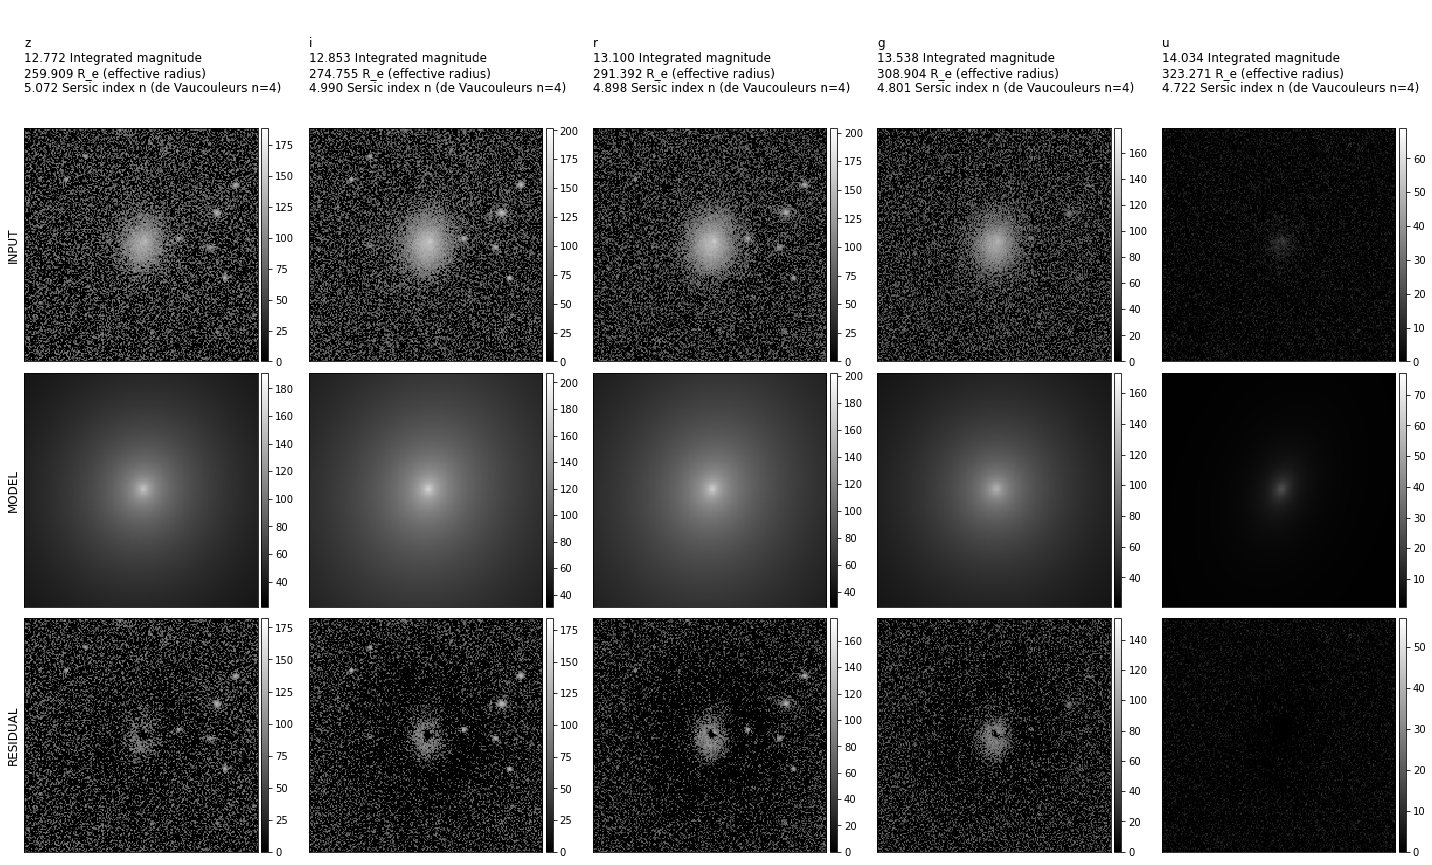

In [39]:
pygalfitClass = read_output_to_class("outputs/testss.galfit.02.band")
pygalfitClass.gen_plot( "sersic", return_plot = False, plot_parameters=[3, 4, 5], colorbar=True)

In [194]:
# Create a code using astropy that takes the nearest object, using ra and dec in degrees, from a table with multiple objects